In [ ]:
#Pearson’s Correlation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
feature_names = load_boston().feature_names
data = pd.DataFrame(X, columns=feature_names)
data['MEDV'] = y

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

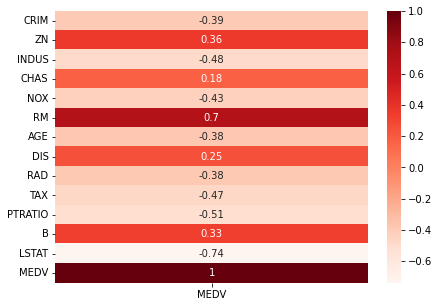

In [ ]:
# compute pearson's r
target_correlation = data.corr()[['MEDV']]
# we only care about the target variable
plt.figure(figsize=(7,5))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

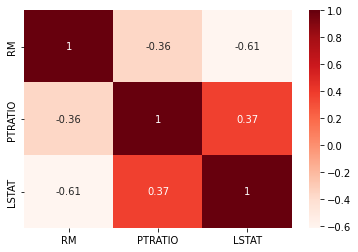

In [ ]:
sns.heatmap(data.corr().loc[['RM', 'PTRATIO', 'LSTAT'], ['RM', 'PTRATIO', 'LSTAT']], annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#LDA
#Linear Discriminant Analysis
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cancer.csv').iloc[:,1:-1]
X = df.drop(['diagnosis'], axis=1)
le = LabelEncoder()
y = le.fit_transform(df.diagnosis)
labels = le.classes_

In [ ]:
steps = [('lda', LinearDiscriminantAnalysis()), ('m', LogisticRegression(C=10))]
model = Pipeline(steps=steps)

In [ ]:
# evaluate model
cv = StratifiedKFold(n_splits=5)
n_scores_lda = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
model = LogisticRegression(C=10)
n_scores = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)

In [ ]:
# report performance
print('f1-score (macro)\n')
print('With LDA: %.2f' % np.mean(n_scores_lda))
print('Without LDA: %.2f' % np.mean(n_scores))

f1-score (macro)

With LDA: 0.97
Without LDA: 0.93


In [ ]:
# ANOVA
from sklearn.feature_selection import f_classif, SelectKBest
fs = SelectKBest(score_func=f_classif, k=5)
X_new = fs.fit(X, y)

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
cv = StratifiedKFold(n_splits=5)
pipeline = Pipeline(steps=[('anova',fs), ('lr', LinearRegression(solver='liblinear'))])
params = {['anova__k']: [i+1 for i in range(X.shape[1])]}
search = GridSearchCV(pipeline, params, scoring='accuracy', n_jobs=-1, cv=cv)
results = search.fit(X, y)
print('Best k: %s' % results.best_params_)

TypeError: ignored

In [ ]:
#χ² Chi-squared tests
from sklearn.feature_selection import chi2, SelectKBest
loan = pd.read_csv('/content/drive/MyDrive/loan_data_set.csv')
loan = loan.drop('Loan_ID', axis=1) # irrelevant feature

In [ ]:
#Transform the numerical feature into categorical feature
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].astype('object')
loan['Credit_History'] = loan['Credit_History'].astype('object')

In [ ]:
#Dropping all the null value
loan.dropna(inplace = True)

In [ ]:
#Retrieve all the categorical columns except the target
categorical_columns = loan.select_dtypes(exclude='number').drop('Loan_Status', axis=1).columns
X = loan[categorical_columns].apply(LabelEncoder().fit_transform)
y = LabelEncoder().fit_transform(loan['Loan_Status'])
fs = SelectKBest(score_func=chi2, k=5)
X_kbest = fs.fit_transform(X, y)

In [ ]:
X_kbest